# Evaluation of a sound structure and preparation

**Author:** Fábio Oliveira

**Achievement:** I understood what each of the basic transformation is doing to the wave files has the input preparation is performed.


## Introduction

In this notebook, and since it is my first time working with sound files, I try to understand the its structure and understand the type of pretreaments that are normally made.

Some of the evaluations will be:
* Preparation of the data to evalaution
* Evaluate the structure of the files
* Test the pretreatments of the sound files

Most of this initial evalaution is based on this [post](https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5).

In [1]:
%load_ext watermark
%watermark

Last updated: 2021-07-08T10:29:07.319681+01:00

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.25.0

Compiler    : MSC v.1928 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit



### Import modules

In [62]:
import torch
import torchaudio
from torchaudio import transforms
import matplotlib.pyplot as plt
import seaborn

### Load the audio file

Each of the audio files has two type of information when we load it using pytorch:
* sig: represents the signal
* sr:  represents the sampling rate

In [10]:
sound_file = '../data/7383-3-0-0.wav'
sig, sr = torchaudio.load(sound_file)

### Evaluate signal

I start by evaluating each of the outputs. First the sampling rate and then the signal.

In [68]:
# sampling rate
sr

44100

The sampling rate of this wave is 44100 Hz.

In [69]:
# signal
sig

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0122, -0.0118, -0.0118],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0035, -0.0034, -0.0032]])

Signal tensor is formed by two lists meaning that it is a stereo sound (important in the next steps).

In [17]:
sig.shape

torch.Size([2, 176400])

Signal also has arround 176K per channel.

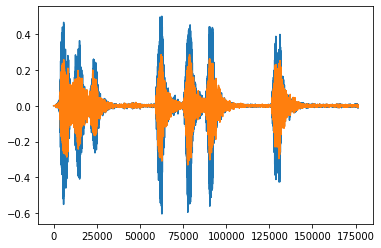

In [70]:
# visualization
plt.plot(sig[0]);
plt.plot(sig[1]);

Both inputs are very similar, but one seems to be less strong than the other. <p>
This was expected since it is a stereo sound.

### Mel Spectrogram

Here I convert the wave file to a mel spectrogram to better understand the transformation.

In [49]:
# first I need to define some variables
n_fft = 1024
hop_len = None
n_mels = 64
top_db = 80

Then I convert the data to a mel spectrogram. <p>
At this point I'm still new to this so I'm not sure what it is happening when I convert a sound wave to a mel spectrogram. I'm just testing things and see the outputs.

In [71]:
# by amplitude
mel_spec_amp = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

In [72]:
# by db
mel_spec_db = transforms.AmplitudeToDB(top_db=top_db)(mel_spec_amp)

Next I want to visualize the mel spectrogram

<AxesSubplot:>

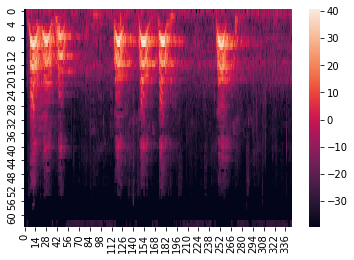

In [73]:
seaborn.heatmap(mel_spec_db[0])

This are then the images that are supplied to train the neural network in recognizing the type of sounds.